# Logistic Regression - Titanic Data Set

I will work with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
%matplotlib inline 

### The Data

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


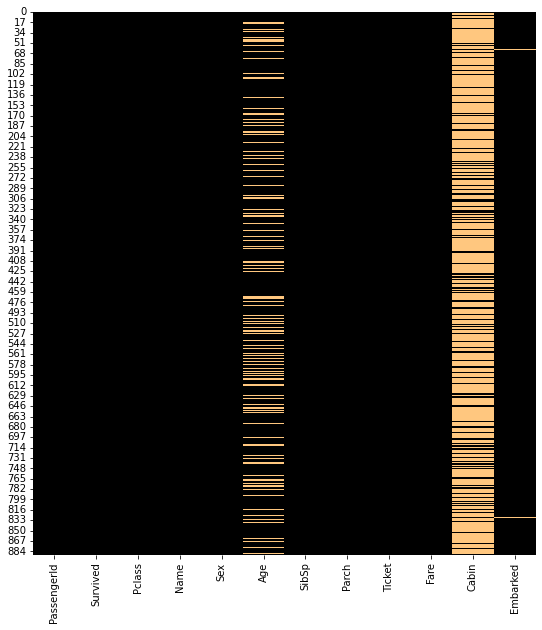

In [3]:
plt.figure(figsize=(9,10))
sns.heatmap(train.isnull(),cmap='copper', cbar=False);


In [4]:
sns.set_style('darkgrid')

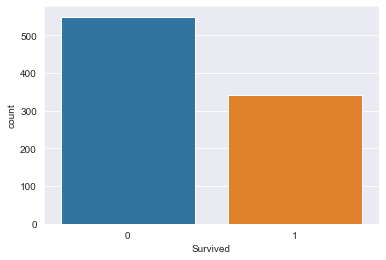

In [5]:
sns.countplot(x='Survived', data=train);

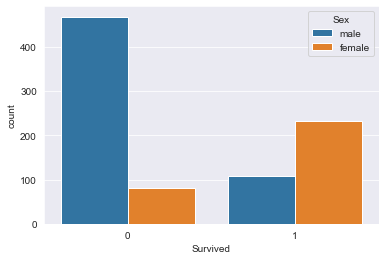

In [6]:
sns.countplot(x='Survived', data=train, hue='Sex');

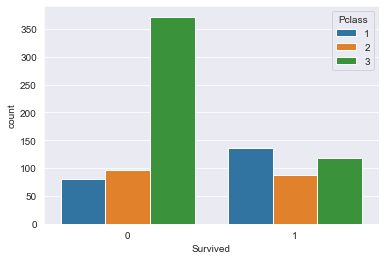

In [7]:
sns.countplot(x='Survived', data=train, hue='Pclass');

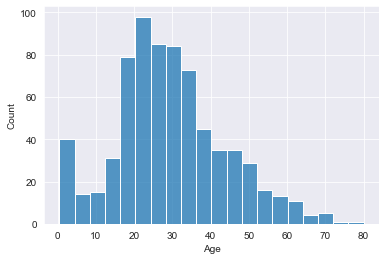

In [8]:
sns.histplot(train.Age.dropna());

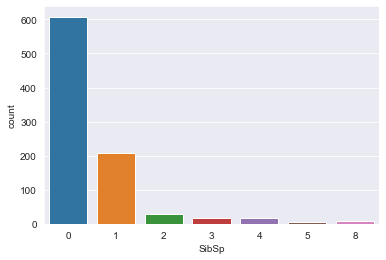

In [9]:
sns.countplot(x='SibSp', data=train);

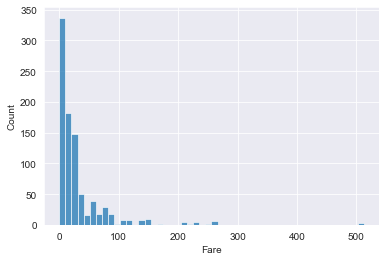

In [10]:
sns.histplot(x='Fare', data=train, bins=50);

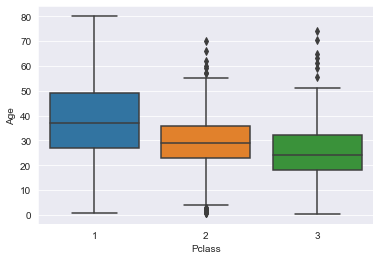

In [11]:
sns.boxplot(y='Age', data=train, x='Pclass');

In [12]:
# filling the age colunm with the average age for each class
def fillin(columns):
    age = columns[0]
    pclass = columns[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else: return age

In [13]:
train['Age'] = train[['Age', 'Pclass']].apply(fillin, axis=1)

<AxesSubplot:>

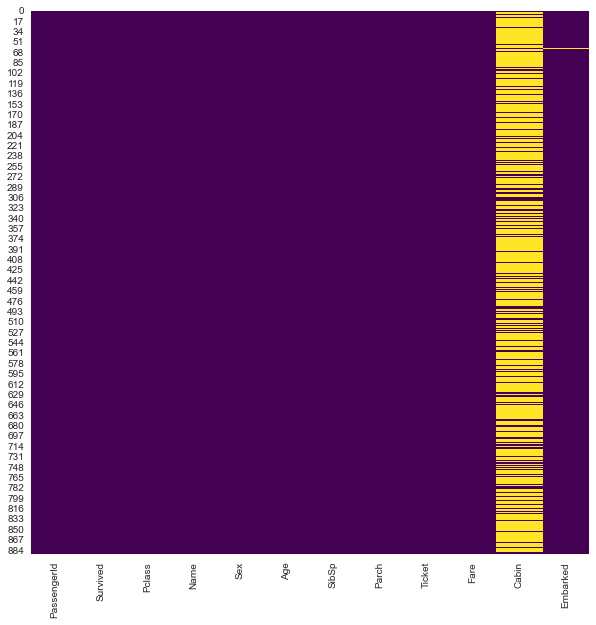

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),cmap='viridis', cbar=False)

<AxesSubplot:xlabel='Age', ylabel='Count'>

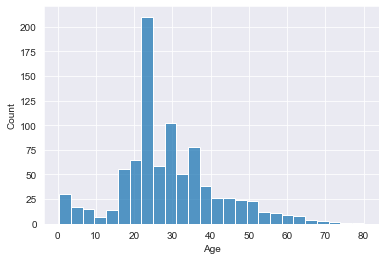

In [15]:
sns.histplot(train['Age'])

In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# Dropping the not useful data which will not be needed during our predictions 
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [18]:
# converting the Sex column to 1 and 0 to as it will be better during our model creation 
sex= pd.get_dummies(train['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [19]:
emb =pd.get_dummies(train['Embarked'])
emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [20]:
train = pd.concat([train, sex, emb], axis=1)

In [21]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,0,1
888,0,3,female,24.0,1,2,23.4500,S,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [22]:
train.drop(columns=['Sex', 'Embarked'], inplace=True)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [23]:
train.dropna(inplace=True)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [24]:
pcla = pd.get_dummies(train.Pclass)

In [25]:
# during our explatory analysis we have found that most of the died persons are from class 3
pcla.columns = ['c1', 'c2', 'c3']
pcla

,c1,c2,c3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [26]:
train = pd.concat([train, pcla], axis=1)
train.drop(columns=['Pclass','Fare'])

,Survived,Age,SibSp,Parch,male,C,Q,S,c1,c2,c3
0,0,22.0,1,0,1,0,0,1,0,0,1
1,1,38.0,1,0,0,1,0,0,1,0,0
2,1,26.0,0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,0,1,1,0,0
4,0,35.0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,1,0,0,1,0,1,0
887,1,19.0,0,0,0,0,0,1,1,0,0
888,0,24.0,1,2,0,0,0,1,0,0,1
889,1,26.0,0,0,1,1,0,0,1,0,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

In [28]:
y= train.Survived

In [29]:
X= train.iloc[:,1:]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [31]:
logr = LogisticRegression(max_iter=100000)

In [32]:
logr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [33]:
pred = logr.predict(X_test)

In [34]:
test = met.classification_report(y_test, pred)

In [35]:
print(test)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       275
           1       0.77      0.70      0.73       171

    accuracy                           0.80       446
   macro avg       0.80      0.78      0.79       446
weighted avg       0.80      0.80      0.80       446



In [40]:
conf = met.confusion_matrix(y_test,pred)

In [45]:
print(conf)

[[240  35]
 [ 52 119]]
